## Import Libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG16
import pandas as pd
import zipfile
import re
import os
import pathlib
print(tf.__version__)


1.14.0


##Mount Drive where images are stored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##Import Dataset

#### Importing the training and validation image numbers from the input files

In [0]:
training_array=[]
validation_array=[]
with open("tst1.txt") as f:
  for line in f:
    training_array.append(line.strip())
with open("trn1.txt") as f:
  for line in f:
    validation_array.append(line.strip())

#### Creating a dictionary with image_ids and their labels

In [0]:
dataset_path='classlabels.txt'
images_labels={}
with open(dataset_path) as f:
        data = f.read().splitlines()
        for d in data:
            #print(d)
            images_labels[d.split(' ')[0].rstrip(",")]=int(d.split(' ')[1])
print(images_labels)

{'JFT_00001.jpg': 1, 'JFT_00002.jpg': 1, 'JFT_00003.jpg': 1, 'JFT_00004.jpg': 1, 'JFT_00006.jpg': 1, 'JFT_00008.jpg': 1, 'JFT_00009.jpg': 1, 'JFT_00010.jpg': 1, 'JFT_00018.jpg': 2, 'JFT_00020.jpg': 2, 'JFT_00021.jpg': 2, 'JFT_00022.jpg': 2, 'JFT_00023.jpg': 2, 'JFT_00024.jpg': 2, 'JFT_00026.jpg': 2, 'JFT_00036.jpg': 2, 'JFT_00039.jpg': 2, 'JFT_00043.jpg': 2, 'JFT_00050.jpg': 2, 'JFT_00051.jpg': 2, 'JFT_00053.jpg': 2, 'JFT_00055.jpg': 2, 'JFT_00061.jpg': 2, 'JFT_00062.jpg': 2, 'JFT_00063.jpg': 2, 'JFT_00064.jpg': 2, 'JFT_00066.jpg': 2, 'JFT_00075.jpg': 2, 'JFT_00078.jpg': 3, 'JFT_00082.jpg': 3, 'JFT_00084.jpg': 3, 'JFT_00086.jpg': 3, 'JFT_00088.jpg': 3, 'JFT_00089.jpg': 3, 'JFT_00090.jpg': 3, 'JFT_00092.jpg': 3, 'JFT_00097.jpg': 3, 'JFT_00098.jpg': 3, 'JFT_00100.jpg': 3, 'JFT_00101.jpg': 3, 'JFT_00103.jpg': 3, 'JFT_00105.jpg': 3, 'JFT_00109.jpg': 3, 'JFT_00111.jpg': 3, 'JFT_00112.jpg': 3, 'JFT_00113.jpg': 3, 'JFT_00114.jpg': 3, 'JFT_00116.jpg': 3, 'JFT_00119.jpg': 4, 'JFT_00121.jpg': 4,

#### Load the training and validaton images and their corresponding labels

In [0]:
train_image = []
train_label = []
training_array=[str(item).zfill(5) for item in training_array]
validation_image = []
validation_label = []
validation_array=[str(item).zfill(5) for item in validation_array]

for i in range(len(training_array)):
    img1 = image.load_img('/content/drive/My Drive/Assignment2_Images/jpg/'+'JFT_'+training_array[i]+'.jpg',target_size=(32,32,3))
    img1 = image.img_to_array(img1)
    img1 = img1/255
    train_image.append(img1)
    train_label.append(images_labels['JFT_'+training_array[i]+'.jpg']-1)
training_images = np.array(train_image)
training_labels = np.array(train_label)

for i in range(len(validation_array)):
    img2 = image.load_img('/content/drive/My Drive/Assignment2_Images/jpg/'+'JFT_'+validation_array[i]+'.jpg',target_size=(32,32,3))
    img2 = image.img_to_array(img2)
    img2 = img2/255
    validation_image.append(img2)
    validation_label.append(images_labels['JFT_'+validation_array[i]+'.jpg']-1)
validation_images = np.array(validation_image)
validation_labels = np.array(validation_label)



#### Check if data is loaded properly

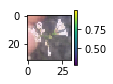

In [0]:
plt.figure(figsize = (1,1))
img1 = training_images[1]
plt.imshow(img1)
plt.colorbar()
plt.grid(False)

In [0]:
training_images.shape[1:]

(32, 32, 3)

### Model Development-Fine tuning with VGG

In [21]:
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(32,32, 3))

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fe20e701860> False
<keras.layers.convolutional.Conv2D object at 0x7fe20dd691d0> False
<keras.layers.convolutional.Conv2D object at 0x7fe20dd69da0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe20dd57320> False
<keras.layers.convolutional.Conv2D object at 0x7fe20dd571d0> False
<keras.layers.convolutional.Conv2D object at 0x7fe20dcf7ba8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe20dcc8c88> False
<keras.layers.convolutional.Conv2D object at 0x7fe20dcc82e8> False
<keras.layers.convolutional.Conv2D object at 0x7fe20dc73438> False
<keras.layers.convolutional.Conv2D object at 0x7fe20dc8ca58> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe20dc9f860> False
<keras.layers.convolutional.Conv2D object at 0x7fe20dc9f5f8> False
<keras.layers.convolutional.Conv2D object at 0x7fe20dc4eba8> False
<keras.layers.convolutional.Conv2D object at 0x7fe20dc65e10> False
<keras.layers.pooling.MaxPooling2D object at 0x7fe20dc15048>

In [0]:
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='softmax'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                30750     
Total params: 15,270,750
Trainable params: 7,635,486
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(training_images, training_labels, batch_size=128, validation_data = (validation_images, validation_labels), epochs=100)


Train on 921 samples, validate on 279 samples
Epoch 1/100
921/921 [==============================] - 103s 112ms/step - loss: 3.1521 - acc: 0.1205 - val_loss: 2.6130 - val_acc: 0.3118
Epoch 2/100
921/921 [==============================] - 99s 108ms/step - loss: 2.1392 - acc: 0.3789 - val_loss: 2.0981 - val_acc: 0.3548
Epoch 3/100
921/921 [==============================] - 100s 109ms/step - loss: 1.5316 - acc: 0.5223 - val_loss: 1.4724 - val_acc: 0.5735
Epoch 4/100
921/921 [==============================] - 66s 72ms/step - loss: 1.1136 - acc: 0.6471 - val_loss: 1.2045 - val_acc: 0.6201
Epoch 5/100
921/921 [==============================] - 55s 60ms/step - loss: 0.8700 - acc: 0.7155 - val_loss: 1.0001 - val_acc: 0.6416
Epoch 6/100
921/921 [==============================] - 56s 61ms/step - loss: 0.6331 - acc: 0.7774 - val_loss: 0.8366 - val_acc: 0.7061
Epoch 7/100
921/921 [==============================] - 56s 61ms/step - loss: 0.4757 - acc: 0.8328 - val_loss: 0.8946 - val_acc: 0.7419
Epoc

NameError: ignored

###Find the Baseline Accuracy
-Identify the class which is common among all the predictions
-Calculate the accuracy by dividing the number of predictions of this class with total predictions

In [29]:
unique, counts = np.unique(validation_labels, return_counts=True)
validation_labels_dict=dict(zip(unique, counts))

maximum = max(validation_labels_dict, key=validation_labels_dict.get)  
print("The class with maximum predictions under it",validation_labels_dict[maximum]+1,"Total number of predictions",sum(validation_labels_dict.values()))
print("Baseline Accuracy",validation_labels_dict[maximum]/sum(validation_labels_dict.values()))

The class with maximum predictions under it 11 Total number of predictions 279
Baseline Accuracy 0.035842293906810034


###Model Performance

In [30]:
print("Model maximum accuracy:",max(history.history['val_acc']))

Model maximum accuracy: 0.8888888873934319


The model seems to produce maximum validation accuracy of 88% slightly better than the previous model and also much better than the baseline accuracy of 3% .There seems to be no overfitting.

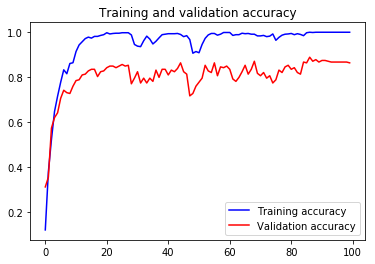

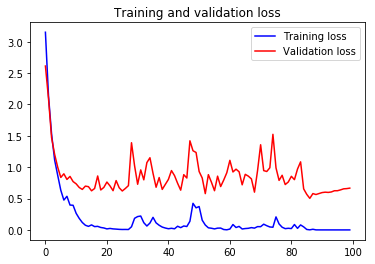

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()